In [85]:
import pandas as pd 
from matplotlib import pyplot as plt
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML documents
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
#function to get wikipedia table into dataframe
# this function takes 2 inputs 
#url: url of the site we want scrape data from
#className: class of the <table> tag
def getdf(url,className):
    wikiurl=url
    table_class="wikitable sortable jquery-tablesorter"
    response=requests.get(wikiurl)
    #print(response.status_code)
    soup = BeautifulSoup(response.text, 'html.parser')
    indiatable=soup.find('table',{'class':className})
    df=pd.read_html(str(indiatable))
    # convert list to dataframe
    df=pd.DataFrame(df[0])
    return df

    

# List of largest retail companies in the world

In [3]:
#we first get all the information of list of largest retail companies.
df_retail=getdf('https://en.wikipedia.org/wiki/List_of_largest_retail_companies','wikitable')

In [4]:
df_retail

,Rank,Name,Dominant operational format,Retail revenue (US$ millions),Net profit margin,Headquarters,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,1,Walmart,Hypermarket/Supercenter/Superstore,559151,2.5%,"United States, Bentonville",NaN,NaN,NaN,NaN,NaN,NaN
1,2,Amazon,"Non-Store,E-commerce",213573,5.5%,"United States, Seattle",NaN,NaN,NaN,NaN,NaN,NaN
2,3,Costco,Cash & Carry/Warehouse Club,166761,2.4%,"United States, Issaquah",NaN,NaN,NaN,NaN,NaN,NaN
3,4,Schwarz Gruppe,Discount Store,144254,...,"Germany, Neckarsulm",NaN,NaN,NaN,NaN,NaN,NaN
4,5,The Home Depot,Home Improvement,132110,9.7%,"United States, Atlanta",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
96,97,El Corte Inglés,Department Store,11098,-28.3%,"Spain, Madrid",NaN,NaN,NaN,NaN,NaN,NaN
97,98,Coupang,Non-store,11045,-4.0%,"South Korea, Seoul",NaN,NaN,NaN,NaN,NaN,NaN
98,99,Hy-Vee,Supermarket,11000,...,"United States, West Des Moines",NaN,NaN,NaN,NaN,NaN,NaN
99,100,Shoprite Holdings,Supermarket,10892,2.9%,"South Africa, Cape Town",NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_retail.columns

Index(['Rank', 'Name', 'Dominant operational format',
       'Retail revenue (US$ millions)', 'Net profit margin', 'Headquarters',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11'],
      dtype='object')

In [6]:
#drop the unnecessary columns
df_retail=df_retail.drop(['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11'],axis = 1)

In [7]:
df_retail

,Rank,Name,Dominant operational format,Retail revenue (US$ millions),Net profit margin,Headquarters
0,1,Walmart,Hypermarket/Supercenter/Superstore,559151,2.5%,"United States, Bentonville"
1,2,Amazon,"Non-Store,E-commerce",213573,5.5%,"United States, Seattle"
2,3,Costco,Cash & Carry/Warehouse Club,166761,2.4%,"United States, Issaquah"
3,4,Schwarz Gruppe,Discount Store,144254,...,"Germany, Neckarsulm"
4,5,The Home Depot,Home Improvement,132110,9.7%,"United States, Atlanta"
...,...,...,...,...,...,...
96,97,El Corte Inglés,Department Store,11098,-28.3%,"Spain, Madrid"
97,98,Coupang,Non-store,11045,-4.0%,"South Korea, Seoul"
98,99,Hy-Vee,Supermarket,11000,...,"United States, West Des Moines"
99,100,Shoprite Holdings,Supermarket,10892,2.9%,"South Africa, Cape Town"


In [9]:
# getting the country information by seperating country and state info from Headquarters column.
df_retail[['country','state','0']]=df_retail['Headquarters'].str.split(',',expand = True)

In [10]:
df_retail

,Rank,Name,Dominant operational format,Retail revenue (US$ millions),Net profit margin,Headquarters,country,state,0
0,1,Walmart,Hypermarket/Supercenter/Superstore,559151,2.5%,"United States, Bentonville",United States,Bentonville,None
1,2,Amazon,"Non-Store,E-commerce",213573,5.5%,"United States, Seattle",United States,Seattle,None
2,3,Costco,Cash & Carry/Warehouse Club,166761,2.4%,"United States, Issaquah",United States,Issaquah,None
3,4,Schwarz Gruppe,Discount Store,144254,...,"Germany, Neckarsulm",Germany,Neckarsulm,None
4,5,The Home Depot,Home Improvement,132110,9.7%,"United States, Atlanta",United States,Atlanta,None
...,...,...,...,...,...,...,...,...,...
96,97,El Corte Inglés,Department Store,11098,-28.3%,"Spain, Madrid",Spain,Madrid,None
97,98,Coupang,Non-store,11045,-4.0%,"South Korea, Seoul",South Korea,Seoul,None
98,99,Hy-Vee,Supermarket,11000,...,"United States, West Des Moines",United States,West Des Moines,None
99,100,Shoprite Holdings,Supermarket,10892,2.9%,"South Africa, Cape Town",South Africa,Cape Town,None


In [11]:
df_retail.country.unique()

array(['United States', 'Germany', 'China', 'Netherlands', 'Japan',
       'United Kingdom', 'France', 'Australia', 'Canada', 'Switzerland',
       'Spain', 'Russia', 'Hong Kong', 'Portugal', 'Sweden', 'India',
       'South Korea', 'Thailand', 'Italy', 'Mexico', 'Chile', 'Finland',
       'South Africa'], dtype=object)

Just want to check for the top 5 countries in the above list

In [12]:

df_retail_count=df_retail.groupby('country').agg({'Name':'count'}).reset_index()


In [13]:
df_retail_count=df_retail_count.rename(columns={"Name":'count'})

In [14]:
df_retail_count=df_retail_count.sort_values('count',ascending=False)

In [15]:
top_5=df_retail_count.head(5)

In [149]:
top_5

,country,count
22,United States,32
5,France,9
6,Germany,9
21,United Kingdom,7
10,Japan,5


<AxesSubplot:xlabel='country', ylabel='count'>

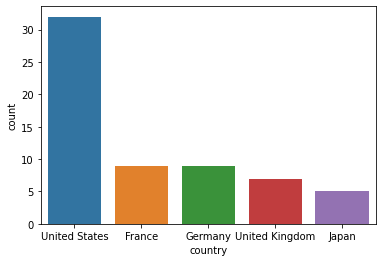

In [16]:
sns.barplot(data=top_5.head(5),x=top_5['country'],y=top_5['count'])

USA has holds top place with 32 companies from top 100 companies. So we want focus on USA retail companies.

# List of USA retail companies

In [17]:
df_retail_usa=df_retail[df_retail['country']=='United States'].reset_index().drop('index',axis=1)

In [148]:
df_retail_usa.

,Global Rank,Name,Dominant operational format,Retail revenue (US$ millions),Net profit margin,Headquarters,country,state,0
0,1,Walmart,Hypermarket/Supercenter/Superstore,559151,2.5,"United States, Bentonville",United States,Bentonville,None
1,2,Amazon,"Non-Store,E-commerce",213573,5.5,"United States, Seattle",United States,Seattle,None
2,3,Costco,Cash & Carry/Warehouse Club,166761,2.4,"United States, Issaquah",United States,Issaquah,None
3,5,The Home Depot,Home Improvement,132110,9.7,"United States, Atlanta",United States,Atlanta,None
4,6,Kroger,Supermarket,131620,2.0,"United States, Cincinnati",United States,Cincinnati,None
5,7,Walgreens Boots Alliance,Drug Store/Pharmacy,117705,0.3,"United States, Deerfield",United States,Deerfield,None
6,10,Target Corporation,Discount Department Store,92400,4.7,"United States, Minneapolis",United States,Minneapolis,None
8,12,Lowe's,Home Improvement,89597,6.5,"United States, Mooresville",United States,Mooresville,None
9,16,Albertsons,Supermarket,69690,1.2,"United States, Boise",United States,Boise,None
10,20,Best Buy,Electronics Specialty,47262,3.8,"United States, Richfield",United States,Richfield,None


In [18]:
df_retail_usa=df_retail_usa.rename(columns={'Rank':'Global Rank'})

In [19]:
df_retail_usa=df_retail_usa.sort_values('Global Rank')

In [20]:
df_retail_usa.columns

Index(['Global Rank', 'Name', 'Dominant operational format',
       'Retail revenue (US$ millions)', 'Net profit margin', 'Headquarters',
       'country', 'state', '0'],
      dtype='object')

# Bar plot for Net profit margin of all USA companies

In [21]:
df_index=df_retail_usa[df_retail_usa['Net profit margin']=='...'].index

In [22]:
df_retail_usa=df_retail_usa.drop(index=df_index,axis=0)

In [23]:
df_retail_usa['Net profit margin'] = df_retail_usa['Net profit margin'].str.replace('%', '').astype('float')

<AxesSubplot:xlabel='Name', ylabel='Net profit margin'>

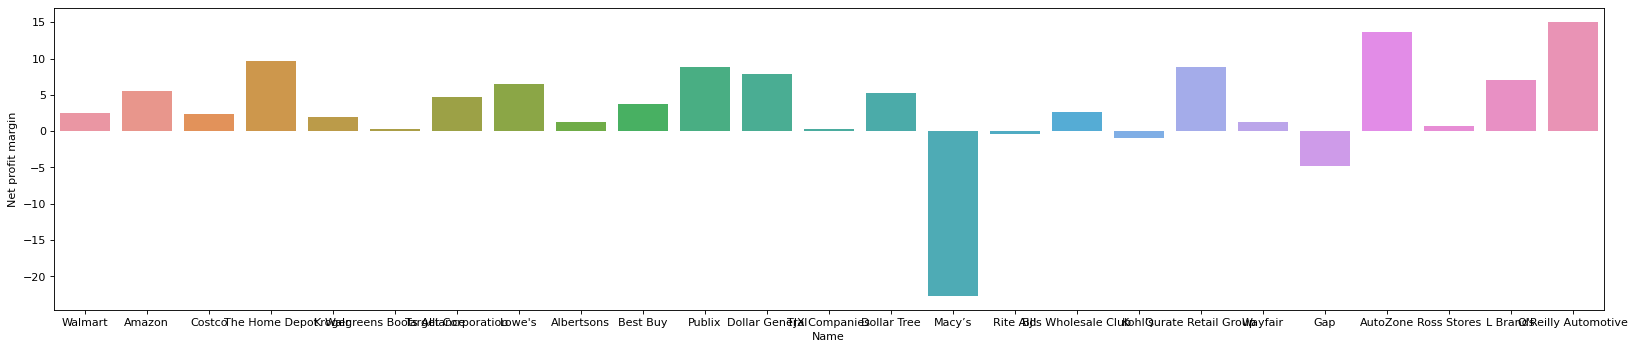

In [24]:
plt.figure(figsize=(25, 5), dpi=80)
sns.barplot(data=df_retail_usa,x=df_retail_usa['Name'],y=df_retail_usa['Net profit margin'])

Top 5 retail companies in USA based on Revenue

In [25]:
df_retail_usa['Name'].head(5)

0           Walmart
1            Amazon
2            Costco
3    The Home Depot
4            Kroger
Name: Name, dtype: object

scraping the data of each of these 5 companies.

# Walmart

In [26]:
# Scraping data of walmart revenue and other details from wikipedia
df_walmart=getdf('https://en.wikipedia.org/wiki/Walmart','wikitable float-left')

In [27]:
df_walmart['companyName']='Walmart'

In [28]:
df_walmart.columns=['Year', 'Revenue[151]in mil. US$', 'Net incomein mil. US$',
       'Total Assetsin mil. US$','Price perShare (US$)', 'Employees','Stores', 'companyName']

In [151]:
df_walmart.head()

,Year,Revenue,NetIncome,Total Assetsin mil. US$,Price perShare (US$),Employees,Stores,companyName,remove
0,1968,12.618754,0.481754,NaN,NaN,NaN,24,Walmart,344]
1,1969,21.365081,0.605211,NaN,NaN,NaN,27,Walmart,344]
2,1970,30.862659,1.187764,NaN,NaN,1000.0,32,Walmart,344]
3,1971,44.286012,1.651599,15.331,NaN,1500.0,38,Walmart,345]
4,1972,78.014164,2.907354,28.463,NaN,2300.0,51,Walmart,345]


In [30]:
# splitting the date column only to get year
df_walmart[['Year','remove']]=df_walmart['Year'].str.split('[',expand = True)

In [31]:
df_walmart.head()

,Year,Revenue[151]in mil. US$,Net incomein mil. US$,Total Assetsin mil. US$,Price perShare (US$),Employees,Stores,companyName,remove
0,1968,12.618754,0.481754,NaN,NaN,NaN,24,Walmart,344]
1,1969,21.365081,0.605211,NaN,NaN,NaN,27,Walmart,344]
2,1970,30.862659,1.187764,NaN,NaN,1000.0,32,Walmart,344]
3,1971,44.286012,1.651599,15.331,NaN,1500.0,38,Walmart,345]
4,1972,78.014164,2.907354,28.463,NaN,2300.0,51,Walmart,345]


In [32]:
df_walmart=df_walmart.rename(columns={'Revenue[151]in mil. US$':'Revenue','Net incomein mil. US$':'NetIncome'})

# Barplot to see how the number of employees in walmart increases over the years.

<AxesSubplot:xlabel='Year', ylabel='Employees'>

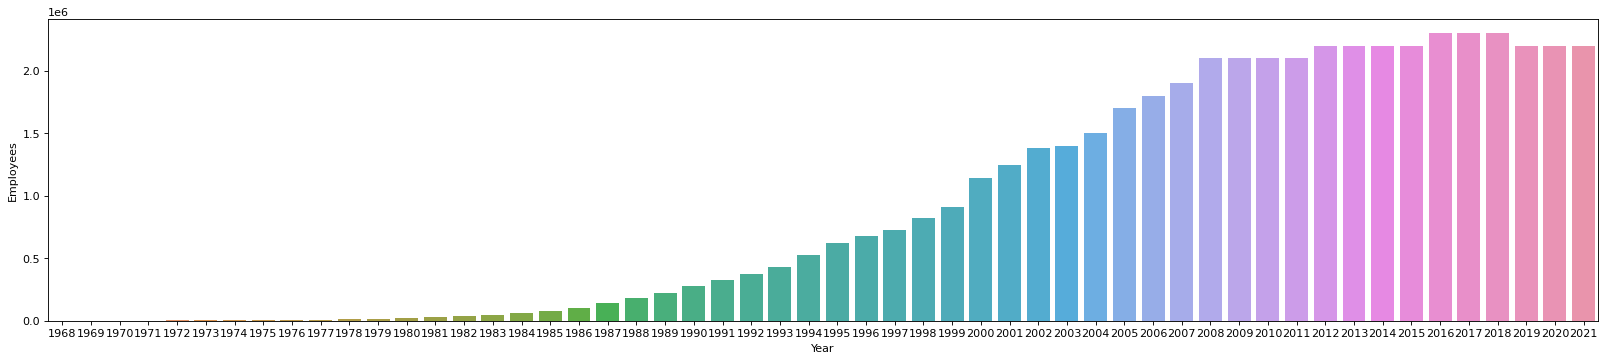

In [153]:
plt.figure(figsize=(25, 5), dpi=80)
sns.barplot(data=df_walmart,x='Year',y='Employees')

# Scatter plot to see the nuumber the number of employees changes as the number of stores increases.

<AxesSubplot:xlabel='Stores', ylabel='Employees'>

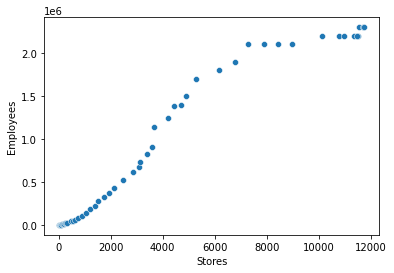

In [33]:
sns.scatterplot(data=df_walmart,x=df_walmart['Stores'],y=df_walmart['Employees'])

It seems like there is a positive correlation between stores vs employees. 
As the number of stores increases the number of employees to work in those stores increases.
Hence, we thought it's good to have a equation which can predict the number number of employeess given number of stores.
We also thought curve might be a better fit then regplot for these points.

In [162]:
df_wal_curve=df_walmart[['Stores','Employees']]

In [163]:
df_wal_curve=df_wal_curve.drop(index=[0,1],axis=0).reset_index()

In [164]:
X=df_wal_curve['Stores']
y=df_wal_curve['Employees']

In [165]:
a,b,c=np.polyfit(X,y,2)

In [166]:
num_stores=np.linspace(0,12000,2000)

In [167]:
pred_employees=a*num_stores**2+b*num_stores+c

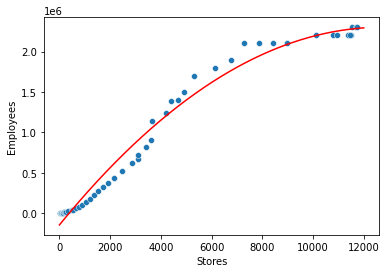

In [168]:
sns.scatterplot(data=df_wal_curve,x=df_wal_curve['Stores'],y=df_wal_curve['Employees'])
plt.plot(num_stores,pred_employees,color='red')

# Amazon

In [41]:
#scrapping amazon's data from wikipedia
df_amazon=getdf('https://en.wikipedia.org/wiki/Amazon_(company)','wikitable float-left')

In [42]:
df_amazon.columns

Index(['Year', 'Revenue[151]in mil. US$', 'Net incomein mil. US$',
       'Total Assetsin mil. US$', 'Employees'],
      dtype='object')

In [43]:
df_amazon['companyName']='Amazon'

In [44]:
df_amazon.head()

,Year,Revenue[151]in mil. US$,Net incomein mil. US$,Total Assetsin mil. US$,Employees,companyName
0,1995[152],0.5,−0.3,1.1,NaN,Amazon
1,1996[152],16.0,−6,8.0,NaN,Amazon
2,1997[152],148.0,−28,149.0,614.0,Amazon
3,1998[153],610.0,−124,648.0,2100.0,Amazon
4,1999[153],1639.0,−720,2466.0,7600.0,Amazon


In [45]:
df_amazon=df_amazon.rename(columns={'Revenue[151]in mil. US$':'Revenue','Net incomein mil. US$':'NetIncome'})

In [46]:
df_amazon

,Year,Revenue,NetIncome,Total Assetsin mil. US$,Employees,companyName
0,1995[152],0.5,−0.3,1.1,NaN,Amazon
1,1996[152],16.0,−6,8.0,NaN,Amazon
2,1997[152],148.0,−28,149.0,614.0,Amazon
3,1998[153],610.0,−124,648.0,2100.0,Amazon
4,1999[153],1639.0,−720,2466.0,7600.0,Amazon
5,2000[153],2761.0,"−1,411",2135.0,9000.0,Amazon
6,2001[153],3122.0,−567,1638.0,7800.0,Amazon
7,2002[153],3932.0,−149,1990.0,7500.0,Amazon
8,2003[154],5263.0,35,2162.0,7800.0,Amazon
9,2004[154],6921.0,588,3248.0,9000.0,Amazon


In [47]:
df_amazon[['Year','remove']]=df_amazon['Year'].str.split('[',expand = True)

In [119]:
df_amazon.Year=df_amazon.Year.astype(int)

In [122]:
df_amazon.Year

0     1995
1     1996
2     1997
3     1998
4     1999
5     2000
6     2001
7     2002
8     2003
9     2004
10    2005
11    2006
12    2007
13    2008
14    2009
15    2010
16    2011
17    2012
18    2013
19    2014
20    2015
21    2016
22    2017
23    2018
24    2019
25    2020
26    2021
27    2022
Name: Year, dtype: int64

<AxesSubplot:xlabel='Year', ylabel='Employees'>

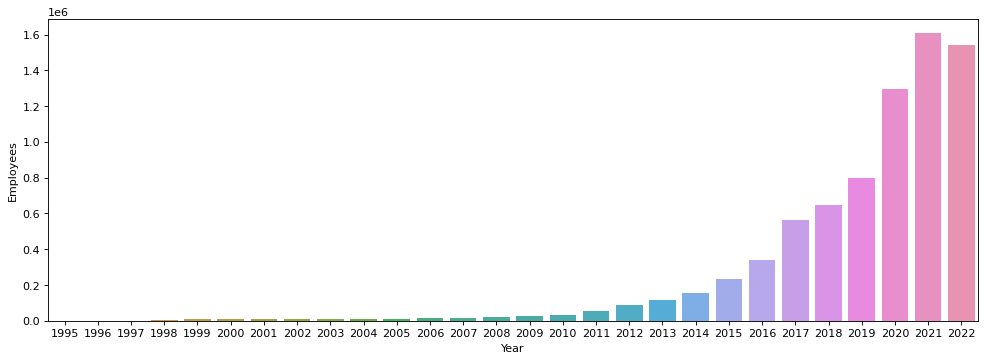

In [125]:
plt.figure(figsize=(15, 5), dpi=80)
sns.barplot(data=df_amazon,x='Year',y='Employees')

<AxesSubplot:xlabel='Revenue', ylabel='Employees'>

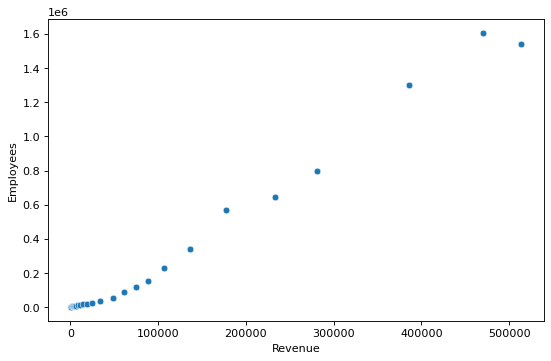

In [130]:
plt.figure(figsize=(8, 5), dpi=80)
sns.scatterplot(data=df_amazon,x='Revenue',y='Employees')

# Costco

In [48]:
df_costco=getdf('https://en.wikipedia.org/wiki/Costco','wikitable float-left')

In [49]:
df_costco['companyName']='Costco'

In [50]:
df_costco=df_costco.rename(columns={'Revenuein mil. USD$':'Revenue','Net incomein mil. USD$':'NetIncome'})

In [51]:
df_costco

,Year,Revenue,NetIncome,Price per Sharein USD$ (year end)[61],Warehouses,Employees,Ref(s),companyName
0,2005,52935,1063,34.96,433,115000,[62],Costco
1,2006,60151,1103,37.73,458,127000,[63],Costco
2,2007,64400,1083,50.26,488,127000,[64],Costco
3,2008,72483,1283,38.20,512,137000,[65],Costco
4,2009,71422,1086,43.68,527,142000,[66],Costco
5,2010,77946,1303,54.02,540,147000,[67],Costco
6,2011,88915,1462,63.06,592,164000,[68],Costco
7,2012,99137,1709,80.99,608,174000,[69],Costco
8,2013,105156,2039,98.67,634,184000,[70],Costco
9,2014,112640,2058,118.86,663,195000,[71],Costco


# Homedepot

In [52]:
df_homedepot=getdf('https://en.wikipedia.org/wiki/The_Home_Depot','wikitable float-left')

In [145]:
df_homedepot

,Year,Revenue,NetIncome,Price per Sharein US$,Employees,Stores,companyName
0,2005,73094,5001.0,29.12,325000.0,1890.0,HomeDepot
1,2006,77019,5838.0,28.12,345000.0,2042.0,HomeDepot
2,2007,79022,5761.0,27.10,364000.0,2147.0,HomeDepot
3,2008,77349,4395.0,19.86,331000.0,2234.0,HomeDepot
4,2009,71288,2260.0,20.14,322000.0,2233.0,HomeDepot
5,2010,66176,2661.0,25.96,317000.0,2244.0,HomeDepot
6,2011,67997,3338.0,30.95,321000.0,2248.0,HomeDepot
7,2012,70395,3883.0,47.14,331000.0,2252.0,HomeDepot
8,2013,74754,4535.0,66.88,340000.0,2256.0,HomeDepot
9,2014,78812,5385.0,78.40,365000.0,2263.0,HomeDepot


In [54]:
df_homedepot=df_homedepot.rename(columns={'Revenuein mil. USD$':'Revenue','Net Incomein mil. USD$':'NetIncome'})

In [55]:
df_homedepot['companyName']='HomeDepot'

# Kroger

In [56]:
df_kroger=getdf('https://en.wikipedia.org/wiki/Kroger','wikitable float-left')

In [146]:
df_kroger

,Year,Revenue,NetIncome,Total Assetsin mil. US$,Price per Sharein US$,Employees,Supermarkets,C-stores,Jewelers,Total stores,companyName
0,2006,60553,958,20482,10.64,290000,2507,791.0,428,3726,Kroger
1,2007,66111,1115,21215,13.79,310000,2468,779.0,412,3659,Kroger
2,2008,70336,1209,22293,13.36,323000,2486,782.0,394,3662,Kroger
3,2009,76148,1249,23257,10.98,326000,2481,771.0,385,3637,Kroger
4,2010,76609,70,23126,10.77,334000,2468,777.0,374,3619,Kroger
5,2011,82049,1116,23505,11.69,338000,2460,784.0,361,3605,Kroger
6,2012,90269,602,23476,11.82,339000,2435,791.0,348,3574,Kroger
7,2013,96619,1497,24634,17.88,343000,2424,786.0,328,3538,Kroger
8,2014,98375,1519,29281,24.41,375000,2640,786.0,320,3746,Kroger
9,2015,108465,1728,30497,36.99,400000,2625,782.0,326,3733,Kroger


In [58]:
df_kroger['companyName']='Kroger'

In [59]:
df_kroger=df_kroger.rename(columns={'Revenuein mil. US$':'Revenue','Net incomein mil. US$':'NetIncome'})

In [60]:
df_kroger.head()

,Year,Revenue,NetIncome,Total Assetsin mil. US$,Price per Sharein US$,Employees,Supermarkets,C-stores,Jewelers,Total stores,companyName
0,2006,60553,958,20482,10.64,290000,2507,791.0,428,3726,Kroger
1,2007,66111,1115,21215,13.79,310000,2468,779.0,412,3659,Kroger
2,2008,70336,1209,22293,13.36,323000,2486,782.0,394,3662,Kroger
3,2009,76148,1249,23257,10.98,326000,2481,771.0,385,3637,Kroger
4,2010,76609,70,23126,10.77,334000,2468,777.0,374,3619,Kroger


In [61]:
df_homedepot.columns

Index(['Year', 'Revenue', 'NetIncome', 'Price per Sharein US$', 'Employees',
       'Stores', 'companyName'],
      dtype='object')

In [62]:
df_walmart.columns

Index(['Year', 'Revenue', 'NetIncome', 'Total Assetsin mil. US$',
       'Price perShare (US$)', 'Employees', 'Stores', 'companyName', 'remove'],
      dtype='object')

In [63]:
df_costco.columns

Index(['Year', 'Revenue', 'NetIncome', 'Price per Sharein USD$ (year end)[61]',
       'Warehouses', 'Employees', 'Ref(s)', 'companyName'],
      dtype='object')

In [64]:
df_amazon.columns

Index(['Year', 'Revenue', 'NetIncome', 'Total Assetsin mil. US$', 'Employees',
       'companyName', 'remove'],
      dtype='object')

In [65]:
df_kroger.columns

Index(['Year', 'Revenue', 'NetIncome', 'Total Assetsin mil. US$',
       'Price per Sharein US$', 'Employees', 'Supermarkets', 'C-stores',
       'Jewelers', 'Total stores', 'companyName'],
      dtype='object')

# concat

In [75]:
df_concat=pd.concat([df_walmart[['Year', 'Revenue', 'NetIncome','companyName']],df_amazon[['Year', 'Revenue', 'NetIncome','companyName']],
                   df_costco[['Year', 'Revenue', 'NetIncome','companyName']],df_homedepot[['Year', 'Revenue', 'NetIncome','companyName']],
                   df_kroger[['Year', 'Revenue', 'NetIncome','companyName']]]).reset_index()

In [140]:
df_concat[df_concat.companyName.isin(['Amazon'])]

,index,Year,Revenue,NetIncome,companyName
54,0,1995,0.5,−0.3,Amazon
55,1,1996,16.0,−6,Amazon
56,2,1997,148.0,−28,Amazon
57,3,1998,610.0,−124,Amazon
58,4,1999,1639.0,−720,Amazon
59,5,2000,2761.0,"−1,411",Amazon
60,6,2001,3122.0,−567,Amazon
61,7,2002,3932.0,−149,Amazon
62,8,2003,5263.0,35,Amazon
63,9,2004,6921.0,588,Amazon


In [142]:
# sns.displot(data=df_concat[df_concat.companyName.isin(['Walmart','Amazon'])], x='Revenue', hue='companyName', kind='kde',common_norm=False)

# display(f'Walmart mean: {df_concat[df_concat.companyName=="Walmart"].Revenue.mean()}')
# display(f'Amazon mean: {df_concat[df_concat.companyName=="Amazon"].Revenue.mean()}')
# display(f'Walmart sd: {df_concat[df_concat.companyName=="Walmart"].Revenue.std()}')
# display(f'Amazon sd: {df_concat[df_concat.companyName=="Amazon"].Revenue.std()}')

# display(stats.ttest_ind(df_concat[df_concat.companyName == 'Walmart'].Revenue, df_concat[df_concat.companyName == 'Amazon'].Revenue))

In [143]:
df_amazon.head()

,Year,Revenue,NetIncome,Total Assetsin mil. US$,Employees,companyName,remove
0,1995,0.5,−0.3,1.1,NaN,Amazon,152]
1,1996,16.0,−6,8.0,NaN,Amazon,152]
2,1997,148.0,−28,149.0,614.0,Amazon,152]
3,1998,610.0,−124,648.0,2100.0,Amazon,153]
4,1999,1639.0,−720,2466.0,7600.0,Amazon,153]


In [144]:
# sns.displot(data=df_concat[df_concat.companyName.isin(['Walmart','Amazon'])], x='Employees', hue='companyName', kind='kde',common_norm=False)

# display(f'Walmart mean: {df_concat[df_concat.companyName=="Walmart"].Employees.mean()}')
# display(f'Amazon mean: {df_concat[df_concat.companyName=="Amazon"].Employees.mean()}')
# display(f'Walmart sd: {df_concat[df_concat.companyName=="Walmart"].Employees.std()}')
# display(f'Amazon sd: {df_concat[df_concat.companyName=="Amazon"].Employees.std()}')

# display(stats.ttest_ind(df_concat[df_concat.companyName == 'Walmart'].Employees, df_concat[df_concat.companyName == 'Amazon'].Employees))

In [169]:
# sns.displot(data=df_concat[df_concat.companyName.isin(['HomeDepot','Kroger'])], x='Revenue', hue='companyName', kind='kde',common_norm=False)

# display(f'HomeDepot mean: {df_concat[df_concat.companyName=="HomeDepot"].Revenue.mean()}')
# display(f'Kroger mean: {df_concat[df_concat.companyName=="Kroger"].Revenue.mean()}')
# display(f'HomeDepot sd: {df_concat[df_concat.companyName=="HomeDepot"].Revenue.std()}')
# display(f'Kroger sd: {df_concat[df_concat.companyName=="Kroger"].Revenue.std()}')

# display(stats.ttest_ind(df_concat[df_concat.companyName == 'HomeDepot'].Revenue, df_concat[df_concat.companyName == 'Kroger'].Revenue))

In [83]:
df_concat.companyName.unique()

array(['Walmart', 'Amazon', 'Costco', 'HomeDepot', 'Kroger'], dtype=object)

In [69]:
df_concat.NetIncome=df_concat.NetIncome.str.replace('−1,411','−1411')
df_concat.NetIncome=df_concat.NetIncome.str.replace('−2,722','−2722')
df_concat.NetIncome=df_concat.NetIncome.str.replace('−0.3','0')

/var/folders/kl/5sjvw0v947l6h9nnnn47l4d00000gn/T/ipykernel_7285/766948117.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_concat.NetIncome=df_concat.NetIncome.str.replace('−0.3','0')


In [78]:
df_concat['Year']=df_concat['Year'].astype(int)

<AxesSubplot:xlabel='Year', ylabel='Revenue'>

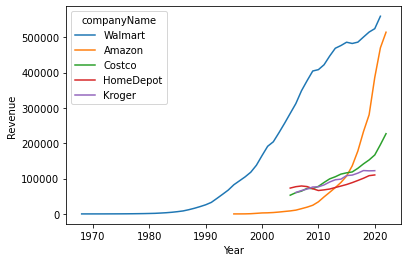

In [79]:
sns.lineplot(data=df_concat,x='Year',y='Revenue',hue='companyName')

(2005.0, 2022.0)

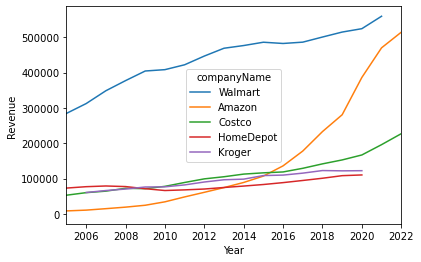

In [127]:
sns.lineplot(data=df_concat,x='Year',y='Revenue',hue='companyName')
plt.xlim([2005,2022])

In [81]:
df_concat.NetIncome.unique()

array([0.481754, 0.605211, 1.187764, 1.651599, 2.907354, 4.591469,
       6.15852, 6.353336, 11.506, 16.546, 21.886, 29.447, 41.151, 55.682,
       82.794, 124.14, 196.244, 270.767, 327.437, 450.086, 627.643,
       837.221, 1075.9, 1291.024, 1608.476, 1994.794, 2333.277, 2681.0,
       2740.0, 3056.0, 3526.0, 4430.0, 5377.0, 6295.0, 6592.0, 7955.0,
       9054.0, 10267.0, 11231.0, 11284.0, 12731.0, 13381.0, 14370.0,
       16389.0, 15699.0, 16999.0, 16022.0, 16363.0, 14694.0, 13643.0,
       9862.0, 6670.0, 14881.0, 13510.0, '−0.3', '−6', '−28', '−124',
       '−720', '−1,411', '−567', '−149', '35', '588', '359', '190', '476',
       '645', '902', '1152', '631', '−39', '274', '−241', '596', '2371',
       '3033', '10073', '11588', '21331', '33364', '−2,722', 1063, 1103,
       1083, 1283, 1086, 1303, 1462, 1709, 2039, 2058, 2377, 2350, 2679,
       3134, 3659, 4002, 5007, 5844, 5001.0, 5838.0, 5761.0, 4395.0,
       2260.0, 2661.0, 3338.0, 3883.0, 4535.0, 5385.0, 6345.0, 7009.0,
     

In [74]:
df_concat['NetIncome']=df_concat['NetIncome'].astype(float)

ValueError: could not convert string to float: '−6'

In [ ]:
sns.lineplot(data=df_concat,x='Year',y='NetIncome',hue='companyName')
